# 第八次课后练习

**负责助教：王瑞环**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第八次课后练习+姓名+学号.ipynb, 例如 第八次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第八次课后练习+张三+1000000000+#.ipynb</span>

# 第零部分 代码理解

请认真阅读代码，结合课件内容理解代码的功能。

### 0 隐含语义分析（LSI） 结合课件内容，阅读理解代码，运行代码，观察理解运行结果

In [1]:
stop_words =['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 
 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 
 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 
 "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 
 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 
 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', 
 "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 
 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 
 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 
 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 
 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 
 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 
 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 
 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 
 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 
 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 
 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 
 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 
 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 
 'yourselves']

In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import word_tokenize

import re

# 读取文件内容
with open('LLM与在线教育-摘要5篇.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# 分割摘要
abstracts = [ab.strip() for ab in text.split('\n\n') if ab.strip()]

In [3]:
# 预处理函数
def preprocess(text):
    # 转换为小写
    text = text.lower()
    # 移除非字母字符
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 分词
    words = text.split()
    
    # 移除停用词
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)
 
# 预处理所有摘要
processed_abstracts = [preprocess(ab) for ab in abstracts]

# processed_abstracts

In [4]:
# 创建TF-IDF向量
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, max_features=10000)
tfidf_matrix = vectorizer.fit_transform(processed_abstracts)

# 执行LSI降维
n_components = 3
svd = TruncatedSVD(n_components=n_components, random_state=42)
lsa_matrix = svd.fit_transform(tfidf_matrix)

# 获取特征词
terms = vectorizer.get_feature_names_out()

# 打印每个维度的前三个代表性词汇
print("降维后的3个维度及其代表词汇：")
for i, component in enumerate(svd.components_):
    terms_in_comp = zip(terms, component)
    sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:3]
    print(f"维度 {i+1}: {', '.join([t[0] for t in sorted_terms])}")

# 打印降维后的矩阵
print("\n降维后的矩阵（5篇摘要×3个维度）：")
print(lsa_matrix)

降维后的3个维度及其代表词汇：
维度 1: learning, students, education
维度 2: social, artificial, significantly
维度 3: students, different, first

降维后的矩阵（5篇摘要×3个维度）：
[[ 0.69385702 -0.25838861 -0.57982039]
 [ 0.37635055  0.7182973  -0.36119611]
 [ 0.87612357 -0.25143588  0.04325799]
 [ 0.45690335  0.65018191  0.36902158]
 [ 0.68278035 -0.24580119  0.48586965]]


这里在做LSI。

首先读入文件后划分摘要。然后re.sub那行把text中r'[^a-zA-Z\s]'（即非字母和空白字符的）全部替换为空，之后再去除所有stop_words中的单词。

创建TF-IDF向量，并对processed_abstracts求示词i在文档j中的权重，并做SVD。然后降维（用前3大的奇异值对应的特征向量组成矩阵做近似）。然后每个维度中输出代表性词（每个维度对应一个抽象主题，这里取出该潜在主题下权重最高的3个关键词）。


##### svd.components_是一个形状为 (n_components, n_features) 的矩阵，其中：

##### 每行对应一个降维后的潜在维度（即一个抽象主题）。

##### 每列对应原始TF-IDF矩阵中的一个词（由 vectorizer.get_feature_names_out() 获取）。

##### 矩阵中的值表示词汇在该维度上的权重（权重越高，词汇对该维度的代表性越强）。

## **1.1** HITS算法
补全HITS算法并计算给出的简易输入的结果

In [5]:
# 构建邻接矩阵
def build_adjacency_matrix(links, n):
    links = np.array(links)
    adjacency_matrix = np.zeros((n, n))
    np.add.at(adjacency_matrix, (links[:, 0], links[:, 1]), 1) # np.add.at(arr, indices, values) 表示：对arr的indices位置加上values
    return adjacency_matrix

def hits_algorithm(adjacency_matrix, max_iterations=100, convergence_threshold=0.0001):
    n = len(adjacency_matrix)
    
    # 初始化hubs和authorities
    hubs = np.ones(n) / n
    authorities = np.ones(n) / n
    
    ###########################################
    # TODO: 迭代更新hubs和authorities
    for _ in range(max_iterations):
        a_new = adjacency_matrix.T @ hubs
        h_new = adjacency_matrix @ authorities

        a_new /= np.linalg.norm(a_new, 2)
        h_new /= np.linalg.norm(h_new, 2)

        if np.linalg.norm(a_new - authorities, 2) < convergence_threshold\
            and np.linalg.norm(h_new - hubs, 2) < convergence_threshold:
            break

        authorities = a_new
        hubs = h_new
    
    ###########################################
    
    
    

    return hubs, authorities

links = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 0)]
n = 4
adjacency_matrix = build_adjacency_matrix(links, n)
hubs, authorities = hits_algorithm(adjacency_matrix)
print('Hubs:', hubs)
print('Authorities:', authorities)

Hubs: [5.77350269e-01 5.77350269e-01 5.77350269e-01 5.12790050e-16]
Authorities: [5.12790050e-16 5.77350269e-01 5.77350269e-01 5.77350269e-01]


## **1.2** SVD图像降维

**Step 1** 读入数据并转灰度图

(630, 622) uint8
255 22


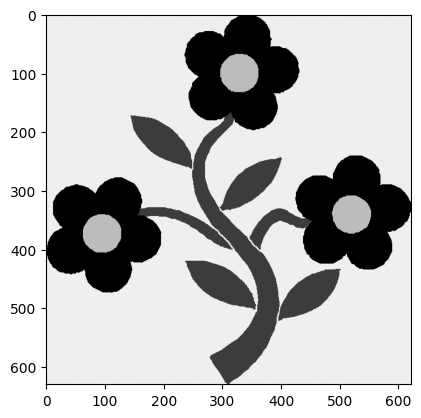

In [6]:
import cv2 
import matplotlib.pyplot as plt 

img = cv2.imread('flowers.bmp') 
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_image.shape, gray_image.dtype)
print(gray_image.max(), gray_image.min())
plt.imshow(gray_image, cmap='gray')
plt.show()

**Step 2** 使用SVD计算并输出前10个奇异值，结果应于示例输出一致

In [7]:
# TODO
from numpy import linalg

U, s, Vt = linalg.svd(gray_image)

print("TOP 10 Eigenvalues:", s[:10])

TOP 10 Eigenvalues: [118894.09324178  25826.9252503   15606.23261365  15150.66705573
  13546.73893039  11238.47564221  11013.52135034   9189.83408978
   8505.26128531   6508.42942914]


**Step 3** 奇异值可视化，可视化效果应该类似示例输出

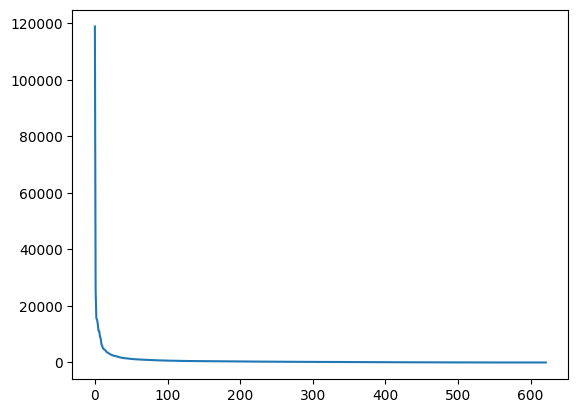

In [8]:
# TODO
plt.plot(s)
plt.show()

**Step 4** 图像重建，重建效果应该示例输出一致

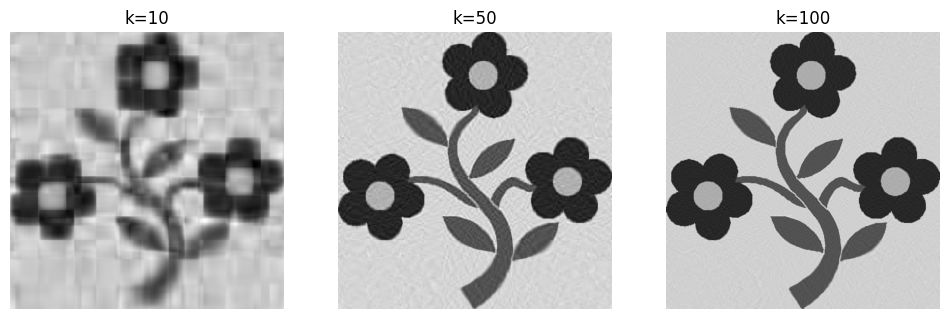

In [9]:
import numpy as np
k_values = [10, 50, 100] # 分别显示不同奇异值获得的图像

plt.figure(figsize=(12,6)) 

sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(sigma, s)

for i, k in enumerate(k_values):
    ###########################################
    # TODO: 使用前k个奇异值重构图像
    reconstructed_image = U @ sigma[:, :k] @ Vt[:k, :]
    ###########################################
    plt.subplot(1, 3, i+1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')